# Student Perfomance Indicator

## 1. Problem Statement
- This project is about how the student's performance is affected by the number of several factors such as Gender, Ethnicity, Parental level education, Lunch and Test Preparation Course.

## 2. Data Collection
- This data is collected from the [Kaggle Student Performance Dataset](https://www.kaggle.com/code/carriech/students-perfomance-in-exams-eda/input).
- This Data Contains 8 columns and 1000 rows.

### 2.1 Importing the data and required libraries

#### Import the Numpy, Pandas, Matplotlib, Seaborn and Warning Library

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Dataset as Pandas DateFrame

In [73]:
df = pd.read_csv("data\stud.csv")

#### Show Top 5 records

In [74]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Student

In [75]:
df.shape

(1000, 8)

### 2.2 Datset information
- Gender : Sex of student -> (Male, Female)
- Ethnicity : Ethnicity of student -> (Group A, B, C, D, E)
- Parental level of education : Highest level of parent's education -> (Bachelor's Degree, Some College, Master's Degree, Associate's Degree, High School)
- Lunch : Having Lunch Before Test -> (Standard or Free/Reduced)
- Test Preparation Course : Complete or Not Complete before test
- Math Score
- Reading Score
- Writing Score

## 3. Data Check to Perform
- Chech Missing Values
- Check Duplicates
- Check for Data Type
- Check the number of Unique Values
- Chack Statistics of Data Set
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [76]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the Dataset

### Check Duplicates

In [77]:
df.duplicated().sum()

0

There are no duplicate values in the Dataset

### 3.3 Check Data Types

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- Here there totally 5 `object` columns and 3 `int64` columns

### 3.4 Check the number of Unique Values

In [79]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check Statistics for the Data

In [80]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights

- From the above analysis, the mean of all the score reanges from 66 - 69 which is very close.
- The standard deviation is about 14 - 15 which is relatively small, indicating that the scores are relatively consistent.
- The minimum for the math score is 0, while for the writing score is 10 and reading score is 17

### 3.6 Check for Categories in different columns

In [81]:
print("Categories of 'gender' variable: ", df['gender'].unique())
print("Categories of 'race_ethnicity' variable: ", df['race_ethnicity'].unique())
print("Categories of 'parental_level_of_education' variable",df['parental_level_of_education'].unique())
print("Categories of 'lunch' variable: ", df['lunch'].unique())
print("Categories of 'test_preparation_course' variable: ", df['test_preparation_course'].unique())

Categories of 'gender' variable:  ['female' 'male']
Categories of 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of 'parental_level_of_education' variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of 'lunch' variable:  ['standard' 'free/reduced']
Categories of 'test_preparation_course' variable:  ['none' 'completed']


In [82]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}.'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}.'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score'].
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'].


### 3.7 Adding columns for "Total Score" and "Average"

In [83]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [84]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Math: {math_full}")

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [85]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 in Reading: {reading_less_20}")
print(f"Number of students with less than 20 in Writing: {writing_less_20}")
print(f"Number of students with less than 20 in Math: {math_less_20}")

Number of students with less than 20 in Reading: 1
Number of students with less than 20 in Writing: 3
Number of students with less than 20 in Math: 4


#### Insights

- From the above details we can see that students had been poor in maths
- Best perfomance is reading section

## 4. Exploring Data (Visualization)

### 4.1 Visualize average score distribution

- Histogram
- Kernel Density Estimation

#### 4.1.1 Histograms & KDE

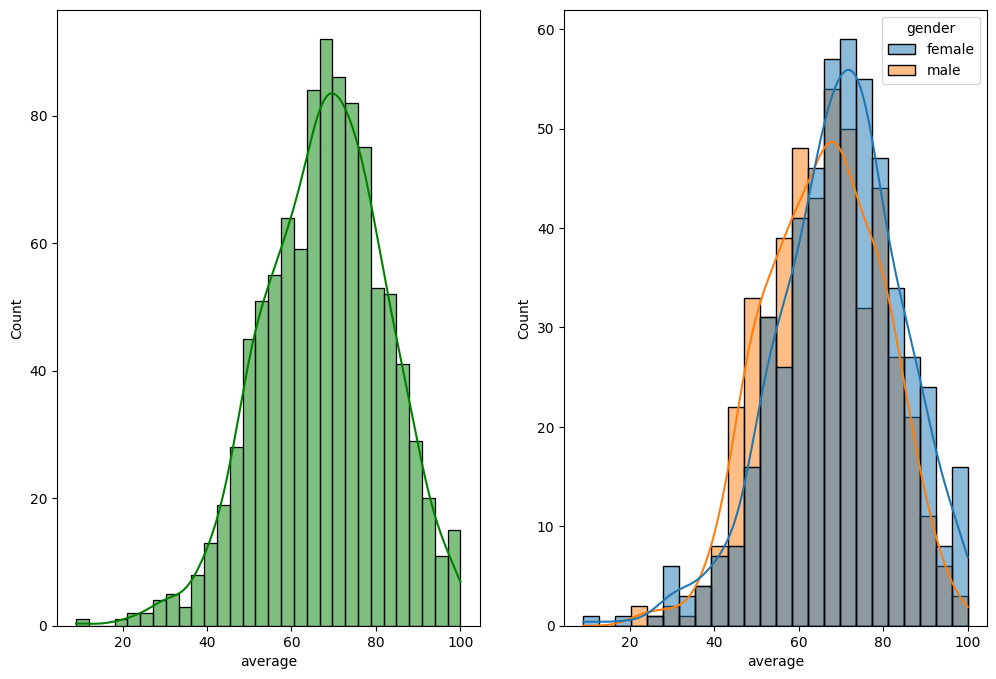

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True,hue="gender")
plt.show()

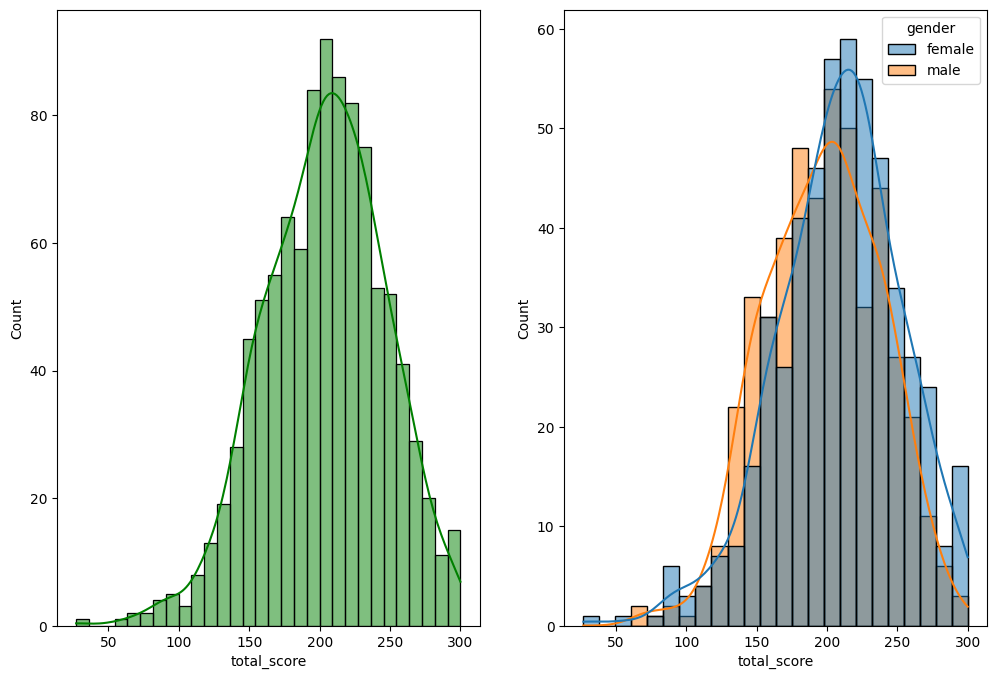

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
plt.subplot(121)
sns.histplot(data=df, x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score',kde=True,hue="gender")
plt.show()

#### Insights

- From the visuals female perform well than male

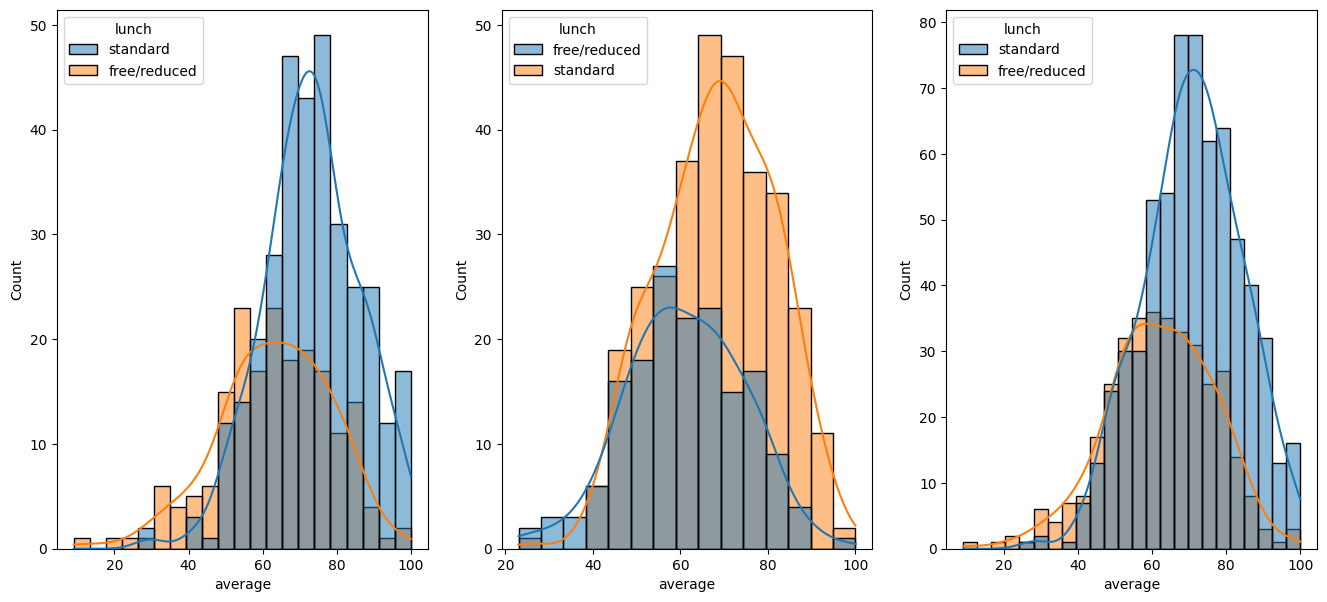

In [88]:
plt.subplots(1,3,figsize=(22,7))
plt.subplot(141)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.show()

#### Insights

- Standard lunch helps students to perform well in exam
- It doesn't depend on the gender

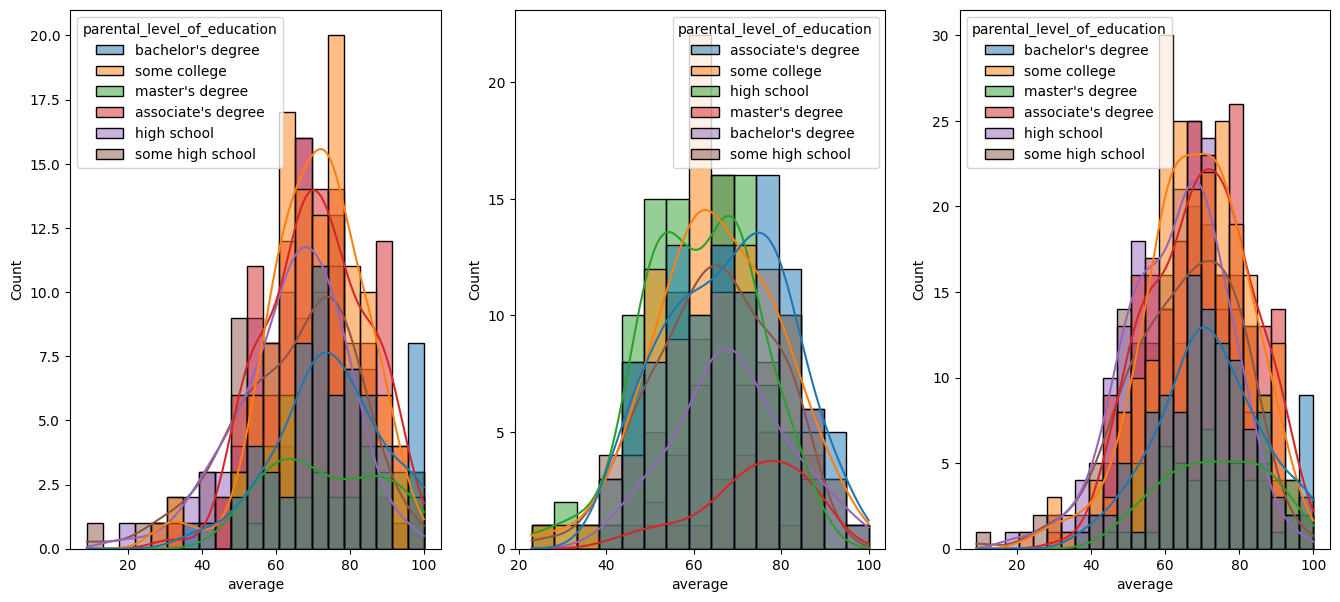

In [89]:
plt.subplots(1,3,figsize=(22,7))
plt.subplot(141)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights

- Almost every category has the same distribution which implies that parent's education has not significantly impacted the distribution of the student's perfomance.
- But we can see that master's degree has a slight left skewness in the 1st plot and has relatively high left skewness in the 2nd and 3rd.
- Similarly associate's degree has a slight left skewness in the 2st plot  which shows that master's and associate's degree have a slight impact on the distribution of the student's performance.

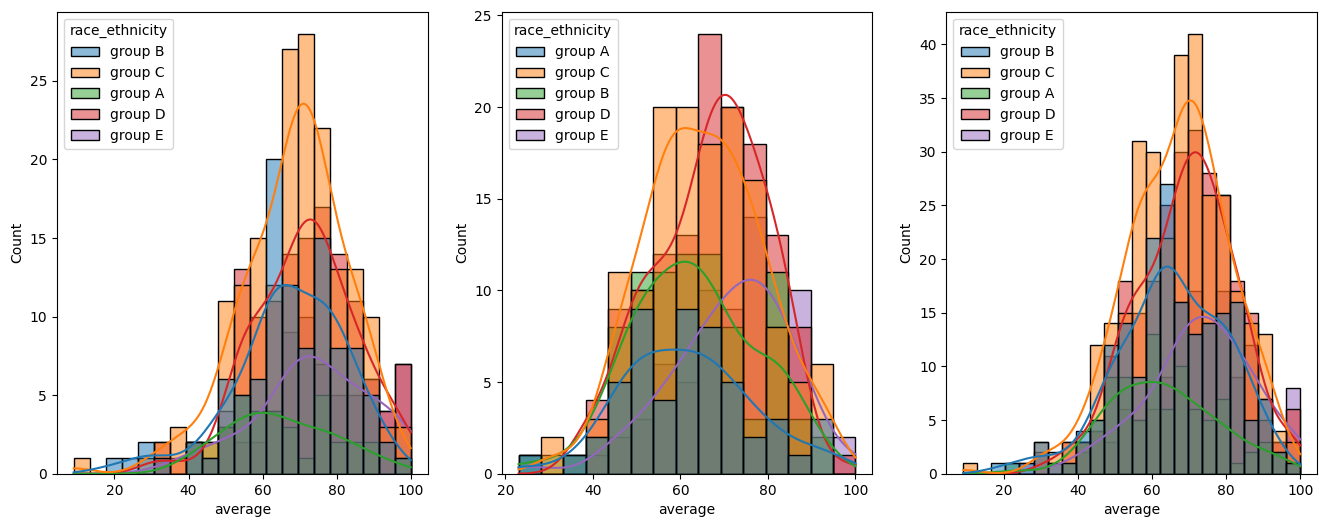

In [90]:
plt.subplots(1,3,figsize=(22,6))
plt.subplot(141)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights

- the Group A tends to perform poorly overall and Group B seems to be little better than Group A but still not good enough to be considered as a good performer.

### 4.2 Maximum score of students in all three subjects

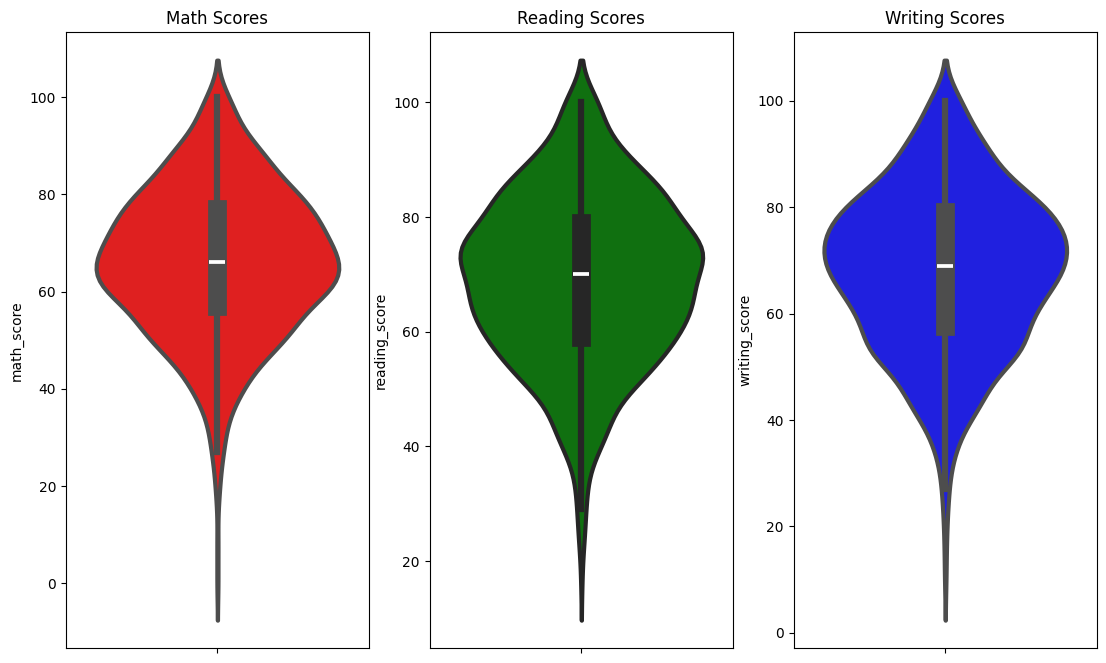

In [91]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights

- We can see that Student's score from 60-80-68 in Maths whereas in Reading and Writing it is 50-80.

### 4.3 Multivariate Analysis using pieplot

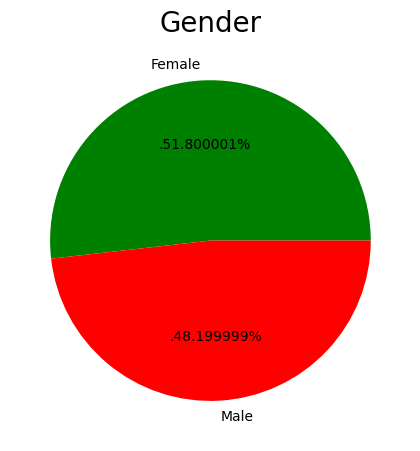

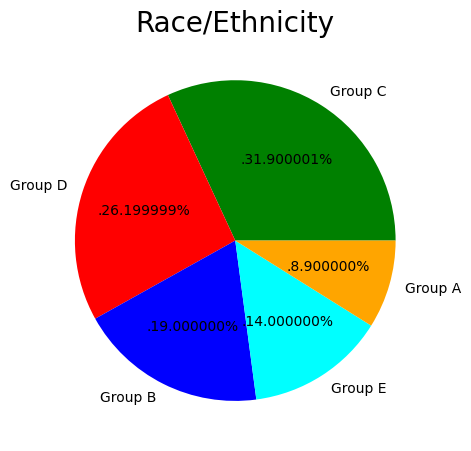

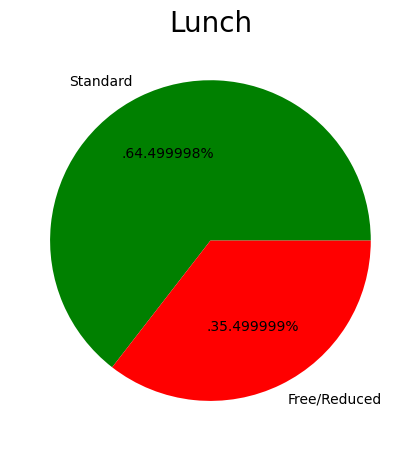

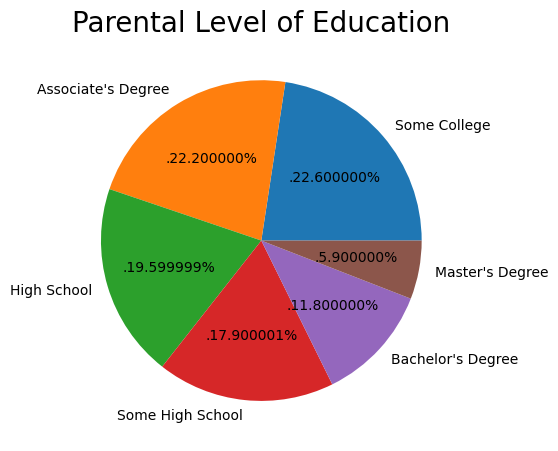

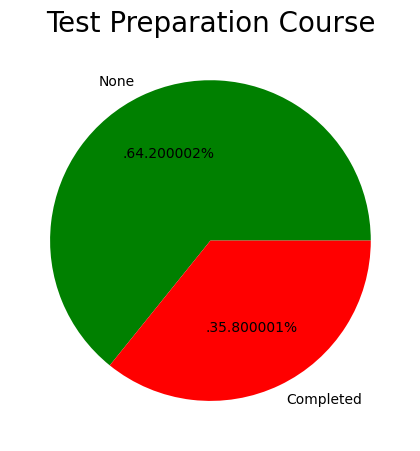

In [92]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female','Male'
colors = ['green','red']

plt.pie(size,colors = colors,labels=labels,autopct='.%1f%%')
plt.title('Gender',fontsize=20)
plt.show()

plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
colors = ['green','red','blue','cyan','orange']

plt.pie(size,colors = colors,labels=labels,autopct='.%1f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.show()

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard','Free/Reduced'
colors = ['green','red']

plt.pie(size,colors = colors,labels=labels,autopct='.%1f%%')
plt.title('Lunch',fontsize=20)
plt.show()

plt.subplot(154)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"

plt.pie(size,labels=labels,autopct='.%1f%%')
plt.title('Parental Level of Education',fontsize=20)
plt.show()

plt.subplot(155)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
colors = ['green','red']

plt.pie(size,colors = colors,labels=labels,autopct='.%1f%%')
plt.title('Test Preparation Course',fontsize=20)
plt.show()

#### Insights

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature wise visualization

#### 4.4.1 Gender Column
- How is the gender column distributed?
- Does gender have any impact on the student's perfomance

#### Univariate Analysis (Gender Distribution)

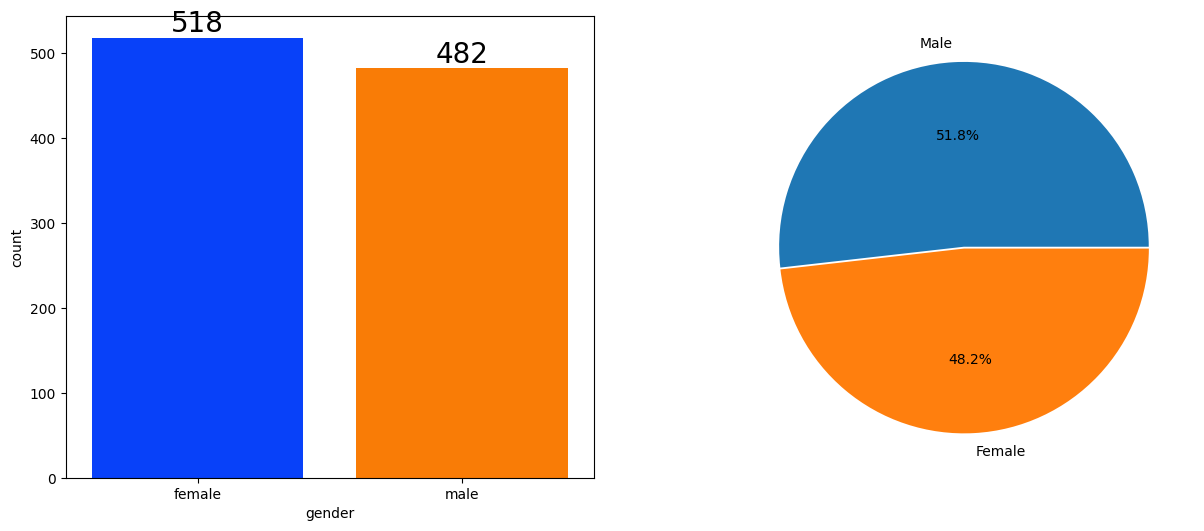

In [93]:
f, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),data=df,labels=['Male','Female'],autopct='%1.1f%%',explode=[0,0.01])
plt.show()

#### Insights

- The gender column is equally distributed with their respective gender having 51.8% and 48.2% of male and female.

#### Bivariate Analysis (Impact on Students' prefomance)

In [94]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


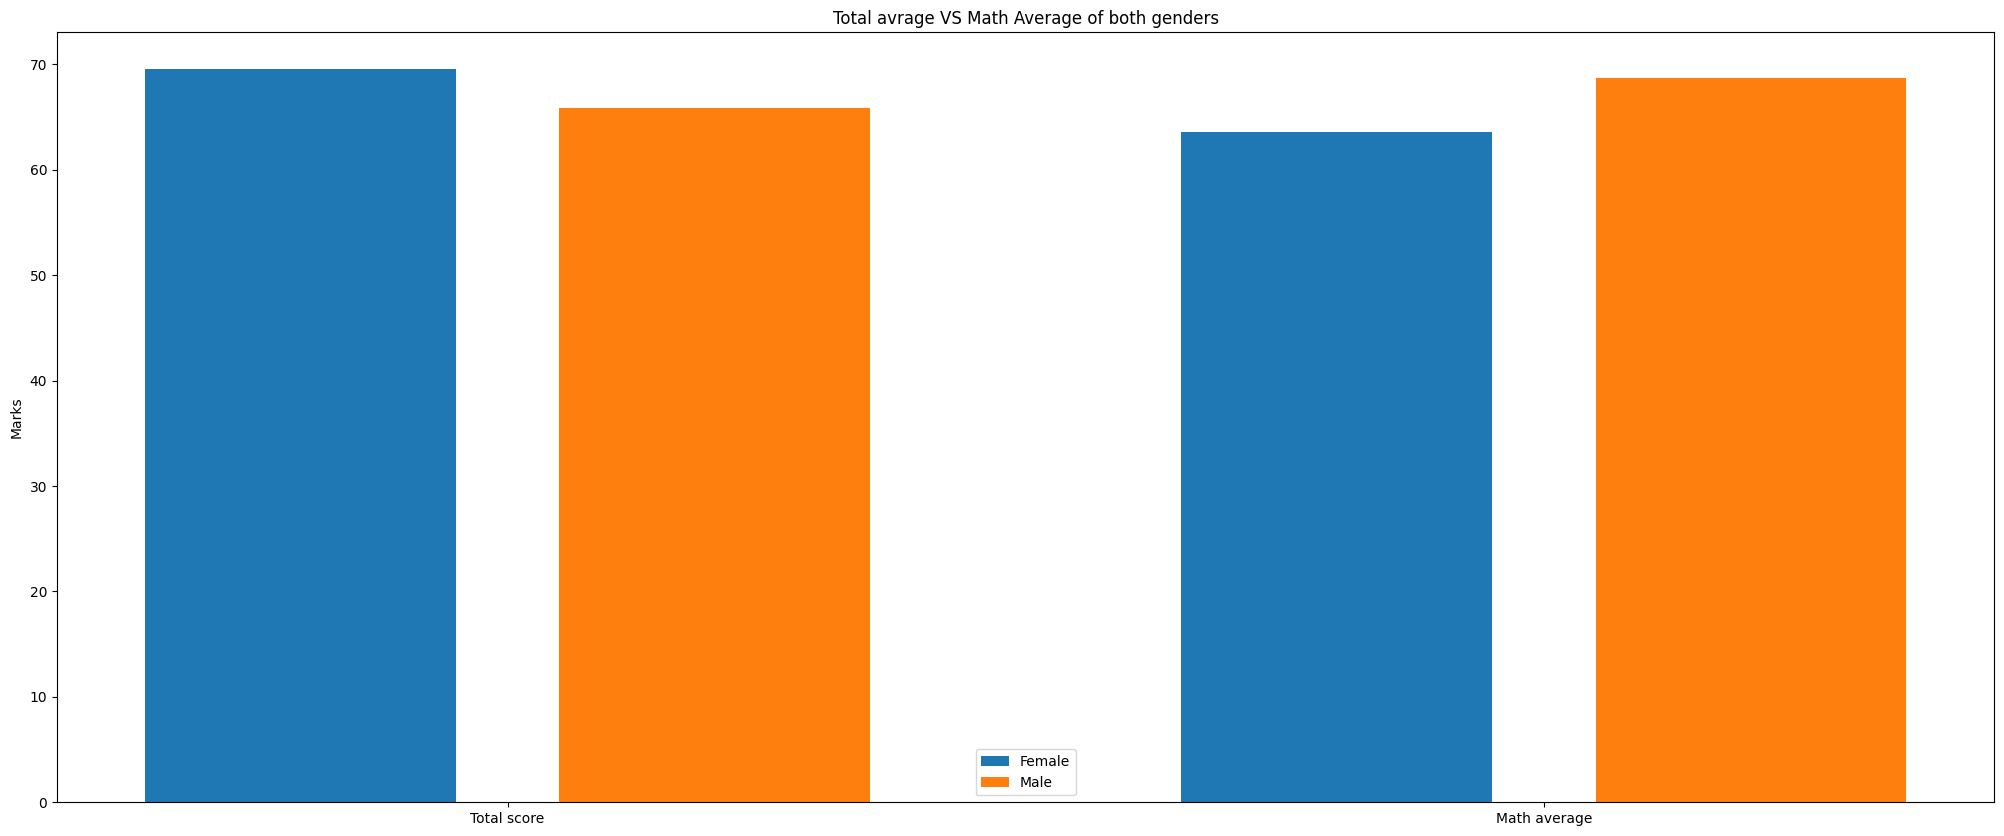

In [124]:
plt.figure(figsize=(25,10))

X = ['Total score','Math average']

female_scores = [gender_group['average']['female'],gender_group['math_score']['female']]
male_score = [gender_group['average']['male'],gender_group['math_score']['male']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, female_scores,0.3, label='Female')
plt.bar(X_axis + 0.2, male_score,0.3, label='Male')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total avrage VS Math Average of both genders')
plt.legend()
plt.show()

#### Insights

- Females have perfomed more overall than males but males have better in Maths.

#### 4.4.2 Race/Ethnicity Column
- How is the Distribution of the groups
- Does it have any impact on the student's perfomance

#### Univariate Analysis (Distribution of the groups)

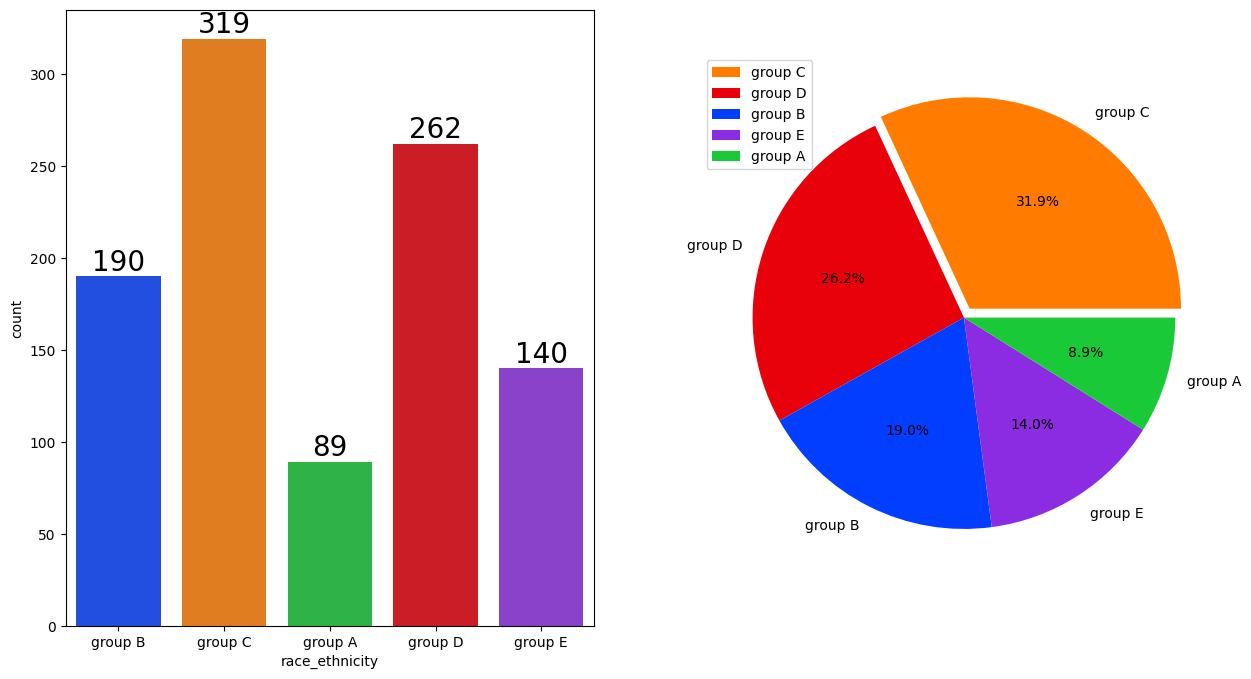

In [118]:
f, ax = plt.subplots(1,2,figsize=(15,8))
groups = df['race_ethnicity'].unique()
palette = sns.color_palette('bright', len(groups))
color_map = dict(zip(groups, palette))
sns.countplot(x=df['race_ethnicity'],data=df,ax=ax[0],palette=color_map)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
race_counts = df['race_ethnicity'].value_counts()
labels = race_counts.index
colors = [color_map[groups] for groups in labels]
plt.pie(x=df['race_ethnicity'].value_counts(),data=df,autopct='%1.1f%%',labels=labels,colors=colors,explode=[0.05,0,0,0,0])
plt.legend()
plt.show()

#### Insights

- Most of the student belonging from group C /group D.
- Lowest number of students belong to group A.

#### Bivariate analysis (Impact on Students' perfomance)

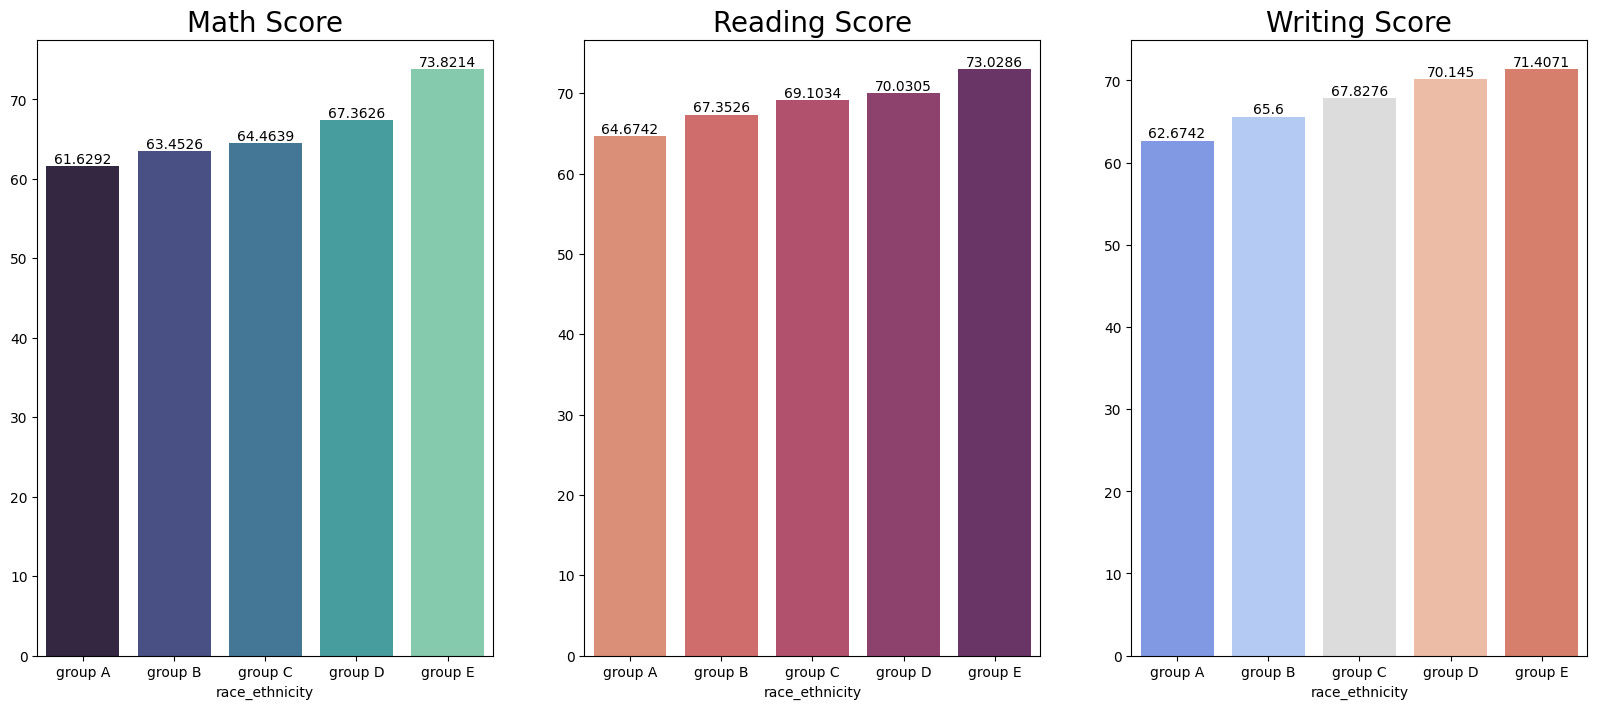

In [122]:
race_group = df.groupby('race_ethnicity')

f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group['math_score'].mean().index,y=race_group['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

sns.barplot(x=race_group['reading_score'].mean().index,y=race_group['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading Score',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)

sns.barplot(x=race_group['writing_score'].mean().index,y=race_group['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing Score',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10)

plt.show()


#### Insights

- From this we can see that the perfomance is increasing with successive group.
- Students from lower backgroud perform slightly poor.

### 4.4.3 Parental level of education
- What is educational background of student's parent
- Does parental education has any impact on student's performance

#### Univariate Analysis (Educational background of student's parent)

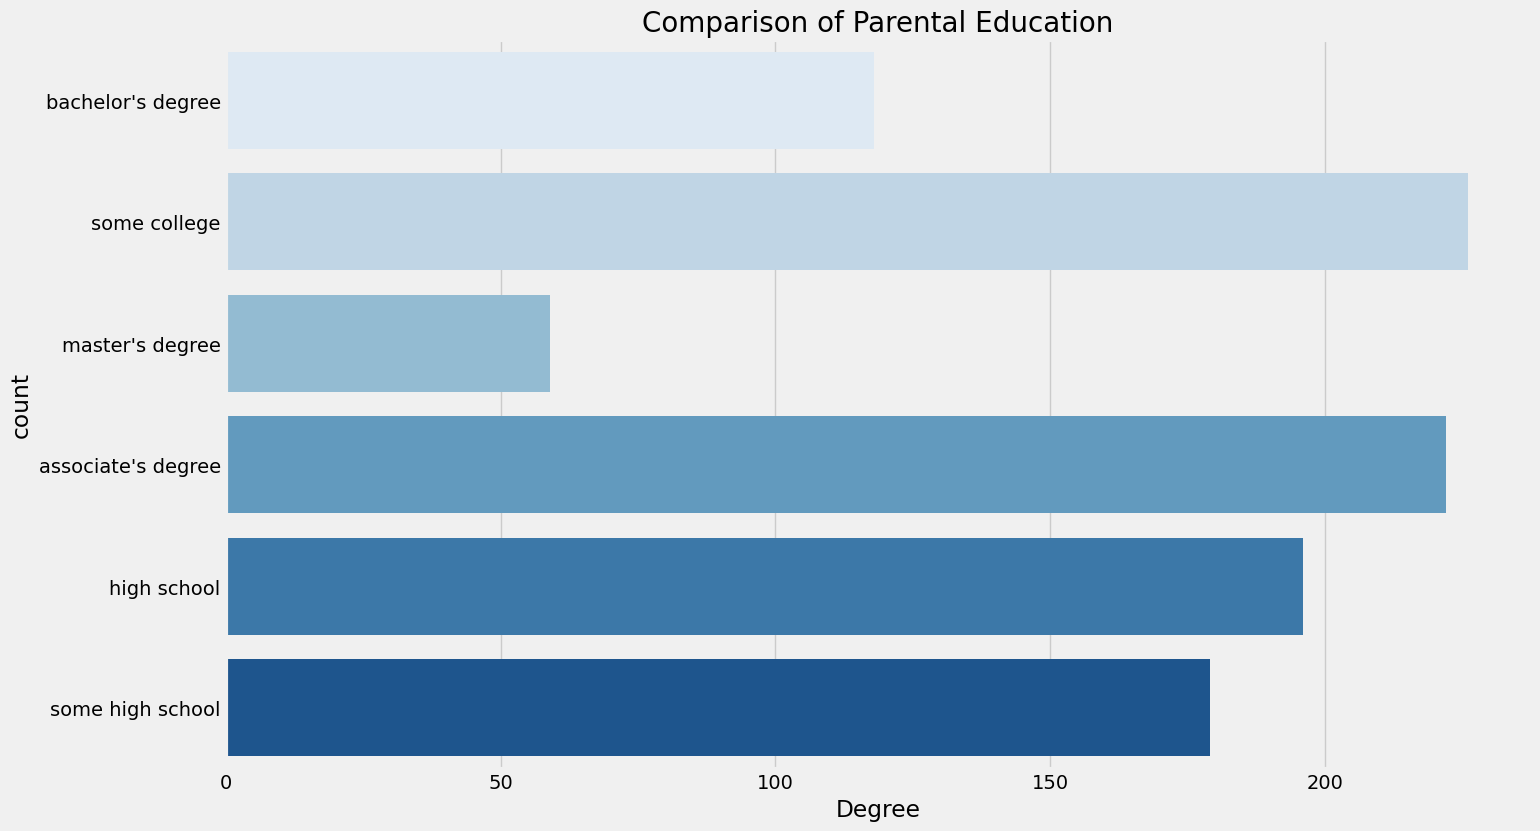

In [126]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### Bivariate Analysis (Impact on Students' perfomance)

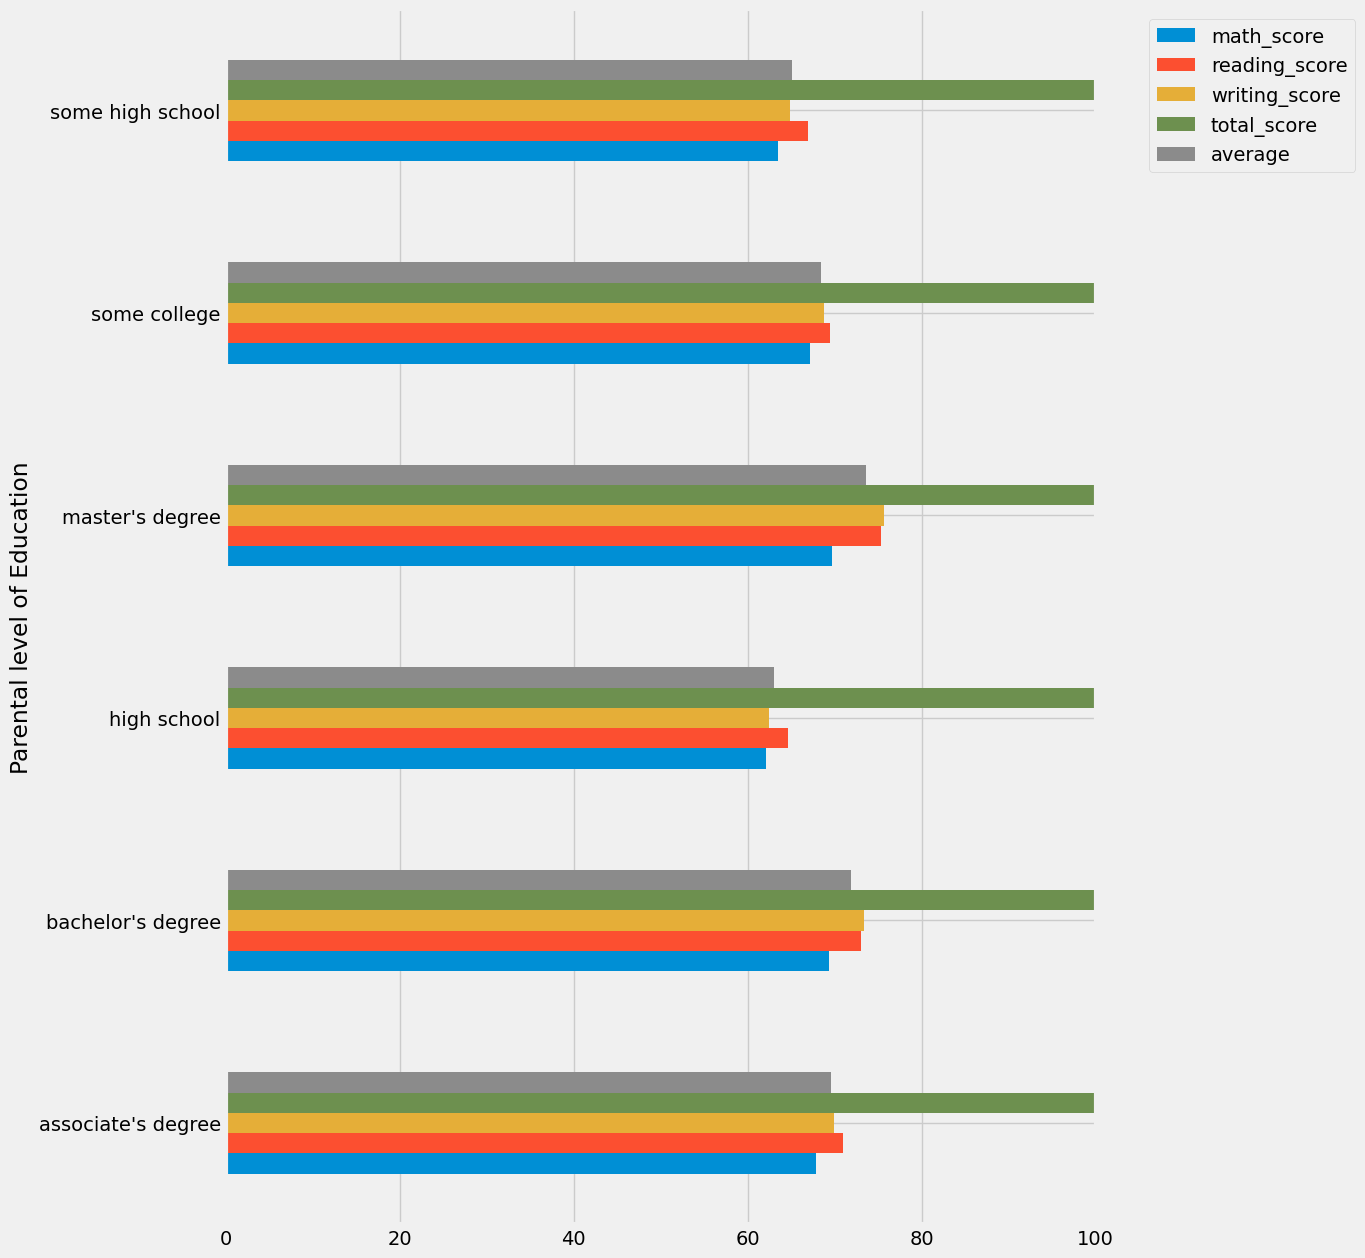

In [ ]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,15))
plt.ylabel("Parental level of Education")
plt.xlim(0, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#### Insights

- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students
- What is the effect of lunch type on test results

#### Univariate Analysis (Most common type of lunch)

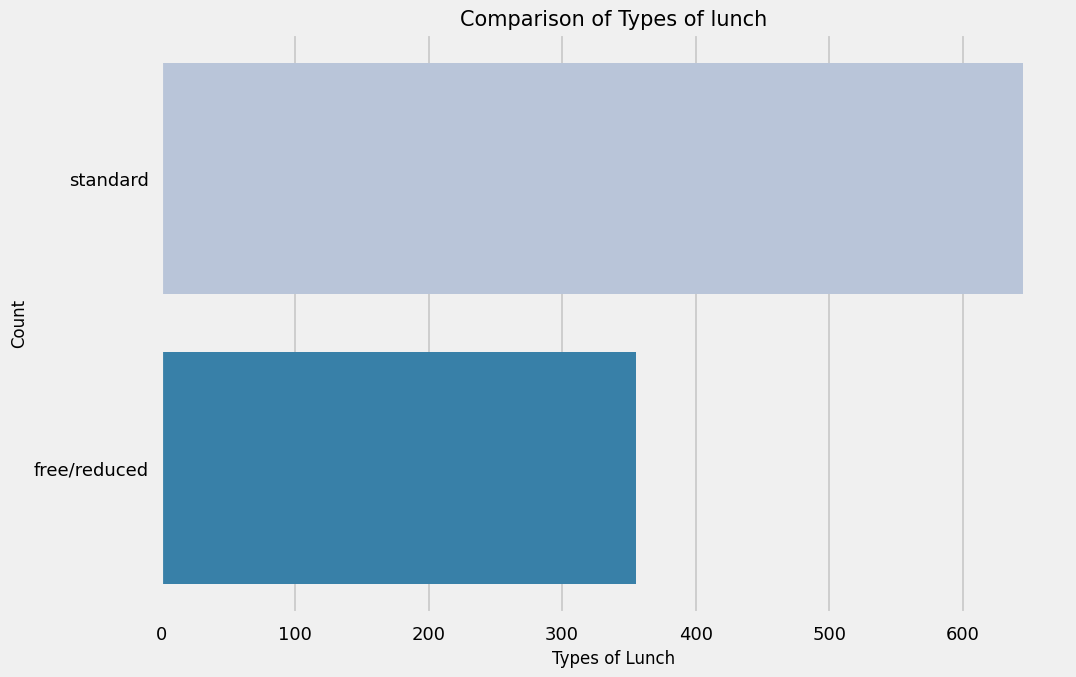

In [147]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of Types of lunch',fontweight=15,fontsize=15)
plt.xlabel('Types of Lunch',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

#### Insights

- Most number of students prefer Standard type of Lunch

### 4.4.5 Test Preparation Course
- Does Test Preparation Course have impact on the Students' perfomance

<Axes: xlabel='writing_score', ylabel='test_preparation_course'>

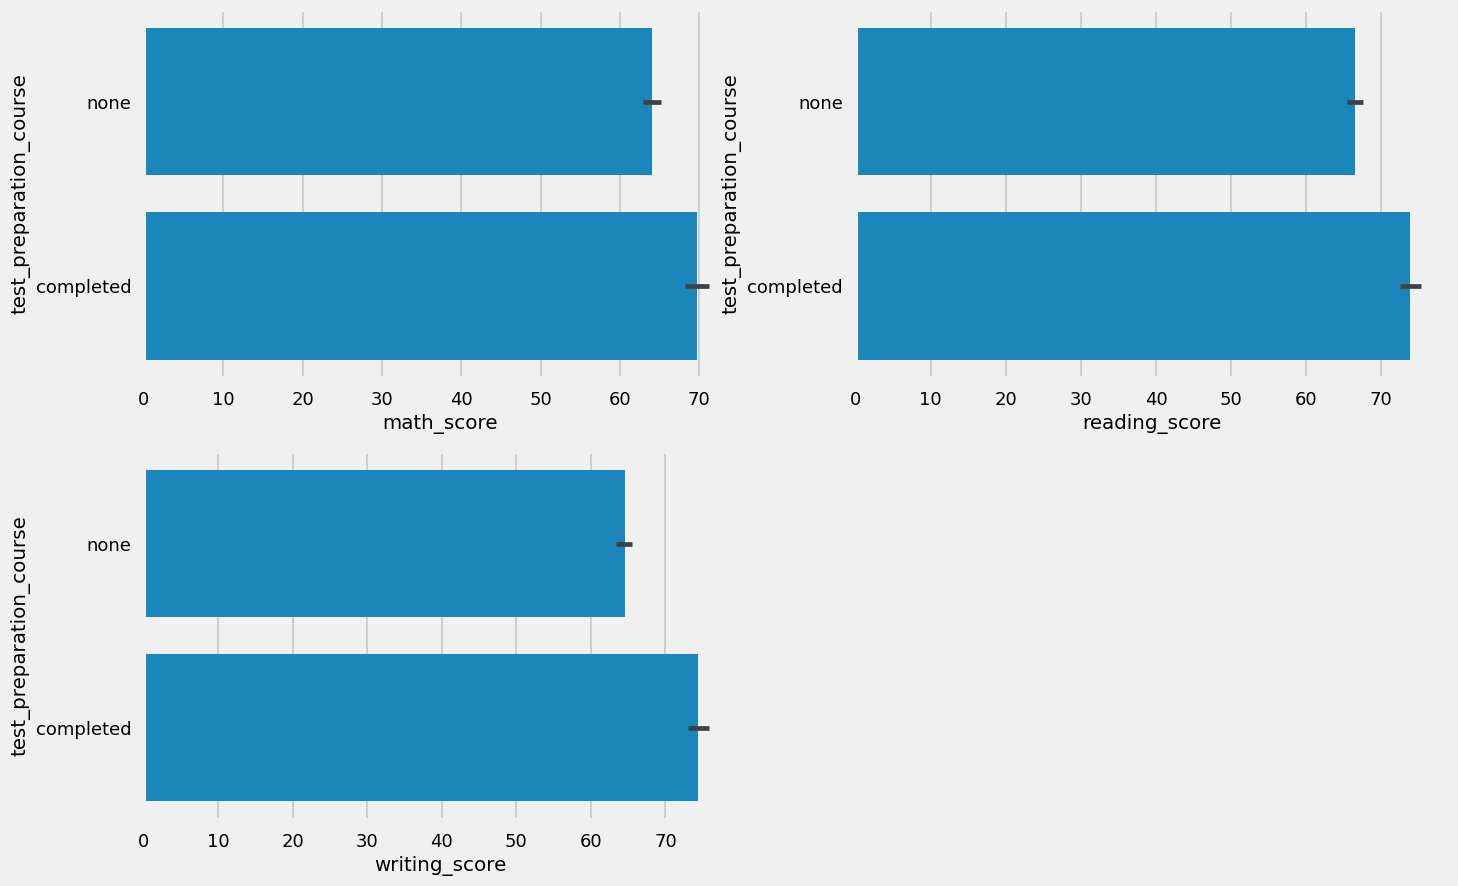

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot (x=df['math_score'], y=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['reading_score'], y=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['writing_score'], y=df['test_preparation_course'])

## 5. Bivariate Analysis (Not Column wise)
### 5.1 Impact of Parental level of education in Lunch Type and Test Preparation Course

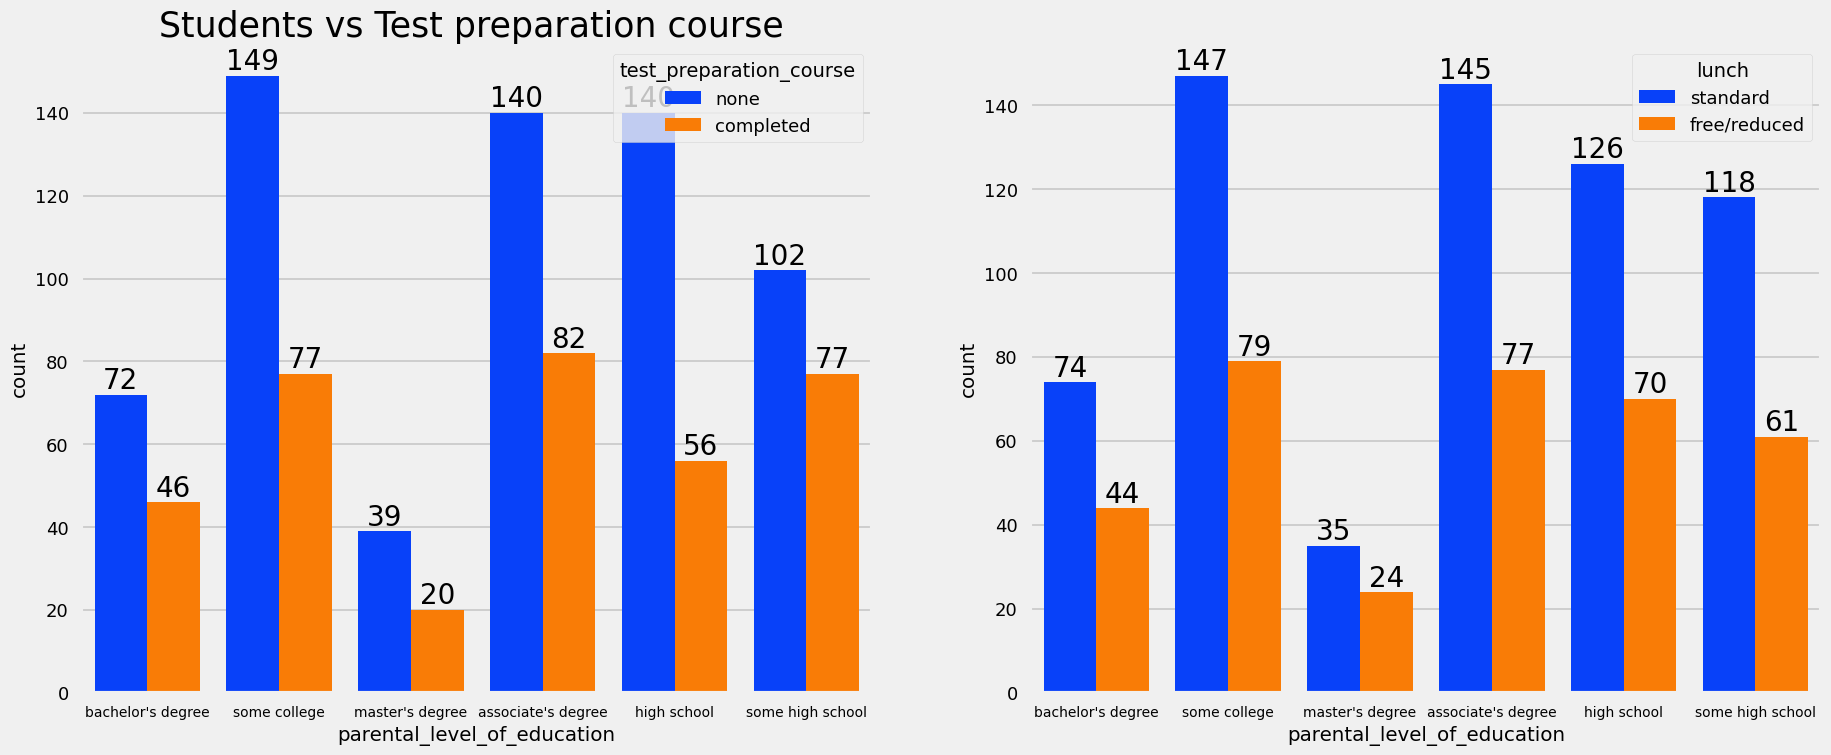

In [156]:
f,ax=plt.subplots(1,2,figsize=(20,8))
plt.subplot(121)
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs Test preparation course ',color='black',size=25)
plt.xticks(fontsize=10)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(122)
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
plt.xticks(fontsize=10)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
plt.show()

#### Insights

- In the first plot, we can see that the ratio of None to Completed is higher (Almost 2:1) for `some college` and `high school`, from which we may infer that most of their parents are not aware of the test preparation course.
- In the second plot, regardless of the parent's level of education, most of the student prefer Standard lunch

### 5.2 Impact of Race/Ethnicity on the Parental level of education

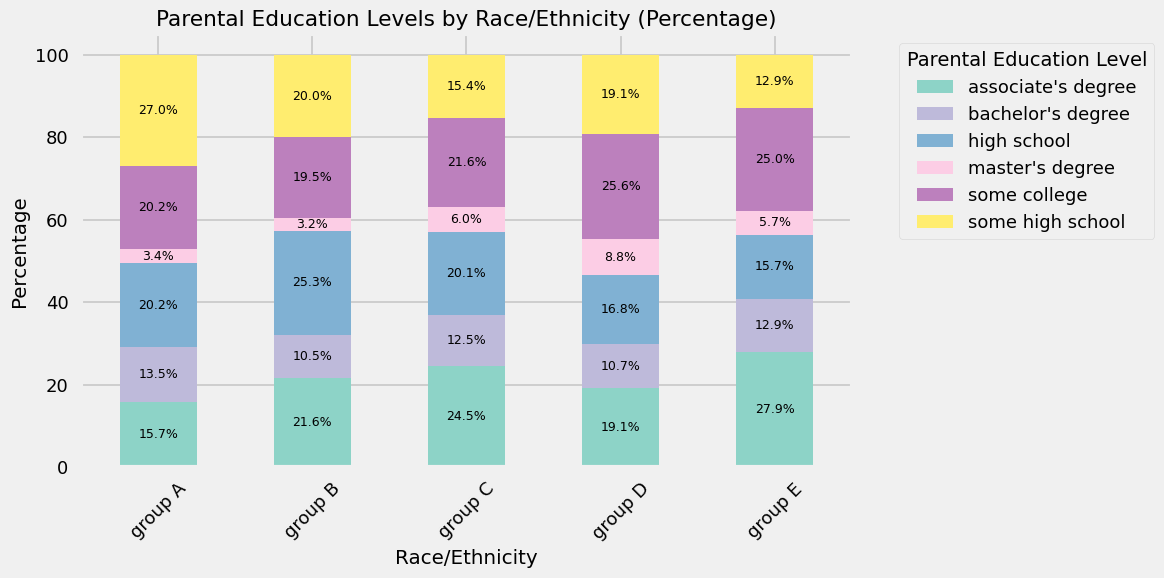

In [161]:
grouped = df.groupby(['race_ethnicity', 'parental_level_of_education']).size().unstack()
percent_df = grouped.divide(grouped.sum(axis=1), axis=0) * 100

ax = percent_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=9)

plt.title("Parental Education Levels by Race/Ethnicity (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Race/Ethnicity")
plt.xticks(rotation=45)
plt.legend(title='Parental Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Insights

- The Race/Ethnicity is slightly possitively influencing the Parental level of education.
- As the Race/Ethnicity increases, the parental level of education also increases.

## 6. Checking for Outliers

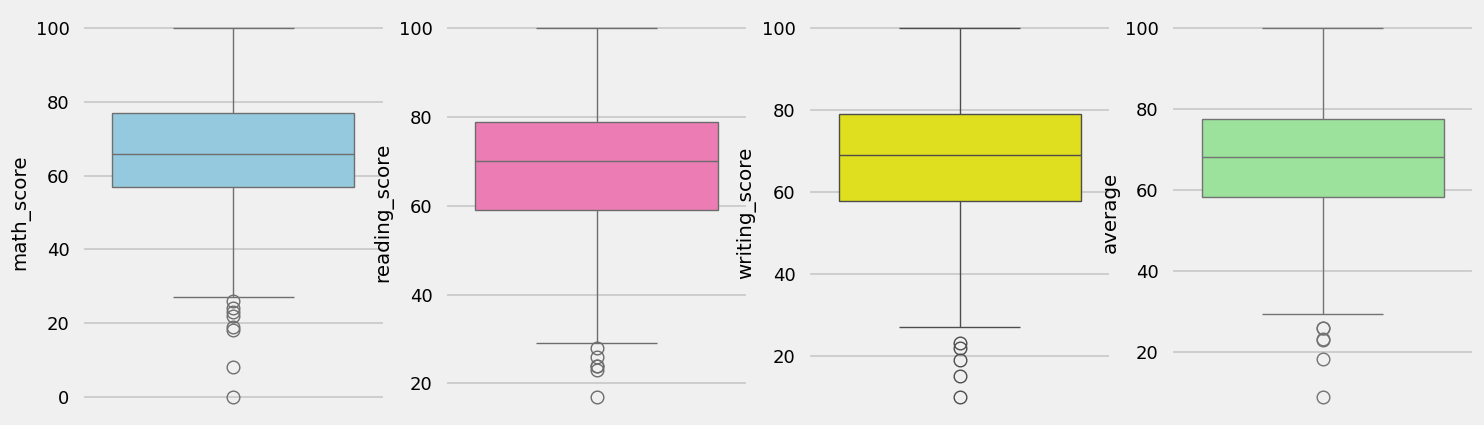

In [158]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Insights
- The outliers are not significant doesn't affect the model accuracy.
- So no need of handling these outliers

## 7. Multivariate Analysis (Not Column wise)
### 7.1 Using pairplot

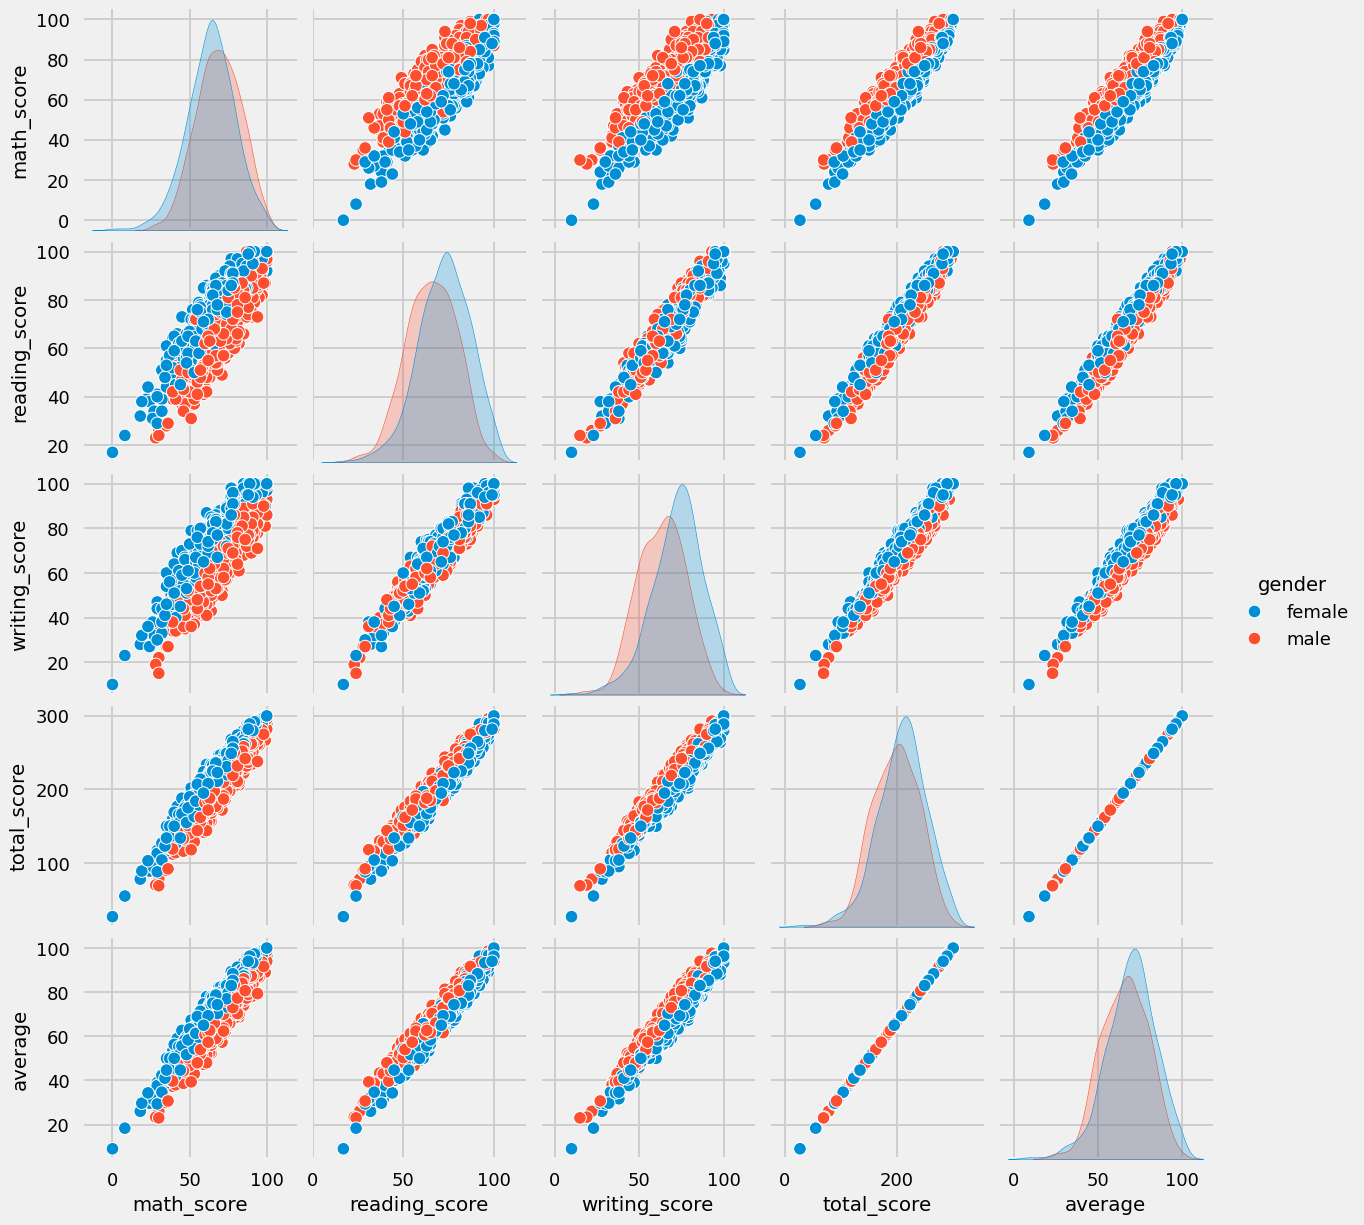

In [168]:
sns.pairplot(df,hue='gender')
plt.show()

## Conclusion
### From the analysis, we can conclude the following:
- Males have a cutting edge in Maths but overall the females perform better.
- Group A performs poor while Group E leads the track.
- The students of parents who hold a Master's degree or Associate's degree tends to perform well.
- The standard lunch mostly preferred for by the students and has a positive relation with the performance.
- The students are recommended to complete a Test Preparation Course for better results.